(38.38383838383838, 12.2334455667789, 26.150392817059483)
{'Przezyly': 342, 'Zginely': 549, 'Nie wiadomo': 0}
(23.08080808080808, 30.849884526558892, 28.15234375)


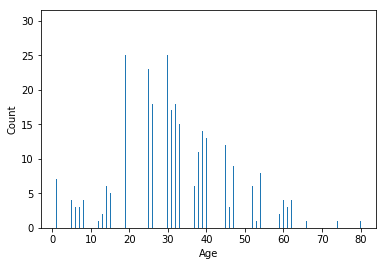

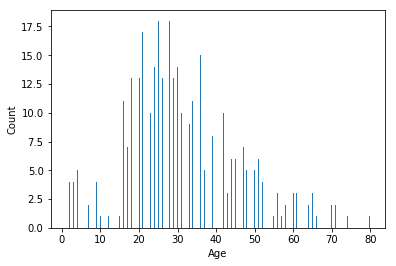

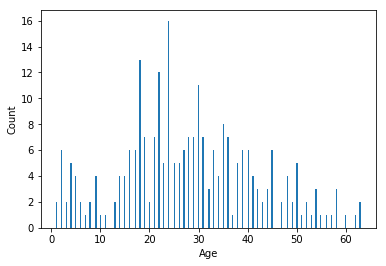

(('Panula', 'Rice', 'Williams'), ('Andersson', 'Baclini', 'Palsson'))


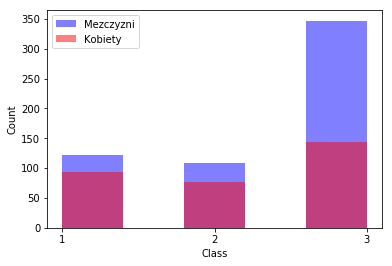

In [8]:
import csv
import matplotlib.pyplot as plt
from collections import Counter


def load_data_from_csv(path):
    data = []
    with open(path, newline='') as file:    #with - po wykonaniu zadania plik jest zamykany
        rows = csv.DictReader(file)         #tworzymy obiekt readera, ktory czyta nasz plik csv po linijkach
        for row in rows:                    #(przy czym kazda linijka jest slownikiem co daje czytelniejsze indeksowanie)
            data.append(row)                #petla z funkcja append(do listy dodawana jest kazda linijka)
    return data


def print_data(data):
    for d in data:
        print(d)
    return


def count_living_passengers(data):
    passengers_count = len(data)
    living_count = 0
    male_count = 0
    female_count = 0

    for d in data:
        if d['Survived'] == '1':
            living_count += 1
            if d['Sex'] == 'male':
                male_count += 1
            elif d['Sex'] == 'female':
                female_count += 1

    #zwracamy z jednej funkcji zarówno procent wszystkich zyjacych pasazerow jak i jednoczesnie
    #procent zyjacych mezczyzn i kobiet
    return percentage(living_count, passengers_count), \
            percentage(male_count, passengers_count), \
            percentage(female_count, passengers_count)


def get_survived_dictionary(data):
    living_count = 0
    dead_count = 0
    unknown_count = 0

    for d in data:
        if d['Survived'] == '1':
            living_count += 1
        elif d['Survived'] == '0':
            dead_count += 1
        else:
            unknown_count += 1

    return {'Przezyly': living_count, 'Zginely': dead_count, 'Nie wiadomo': unknown_count}


def average_age(data, write_errors=False):
    passengers_count = len(data)
    male_count = 0
    female_count = 0

    passengers_age_sum = 0
    male_age_sum = 0
    female_age_sum = 0

    for d in data:
        try:  #moze wystapic wyjatek, jesli w kolumnie z wiekiem bedzie napis zawierajacy cos innego niz cyfry
            age = int(d['Age'])
            passengers_age_sum += age
            if d['Sex'] == 'male':
                male_count += 1
                male_age_sum += age
            elif d['Sex'] == 'female':
                female_count += 1
                female_age_sum += age
        except ValueError:
            if write_errors is True:    #mozemy wybrac za pomoca parametru, czy chcemy aby informacja o wyjatku byla wypisywana na ekran
                print('Wrong format or missing age value')

    return average(passengers_age_sum, passengers_count), \
            average(male_age_sum, male_count), \
            average(female_age_sum, female_count)


def draw_age_hist(data, mode='a', write_errors=False):
    male_age_list = []
    female_age_list = []
    other_age_list = []

    for d in data:  #tworzymy i zapelniamy listy wieku kazdego mezczyzny, kazdej kobiety
        try:        #a takze pasazera bez wpisu/z innym wpisem w tej kolumnie
            age = int(d['Age'])
            if d['Sex'] == 'male':
                male_age_list.append(age)
            elif d['Sex'] == 'female':
                female_age_list.append(age)
            else:
                other_age_list.append(age)
        except ValueError:
            if write_errors is True:
                print('Wrong format or missing age value')

    #wybieramy dane do histogramu
    if mode == 'a':
        hist_data = male_age_list + female_age_list + other_age_list
    elif mode == 'm':
        hist_data = male_age_list
    elif mode == 'f':
        hist_data = female_age_list
    else:
        print('Wrong mode format')
        return

    draw_hist(hist_data, 'Age', 'Count')     #rysujemy histogram w oparciu o te dane
    return


def find_most_common_surnames(data):
    male_names = []
    female_names = []

    for d in data:
        surname = d['Name'].split(",")[0]   #pobranie nazwiska (korzystamy z tego, ze kazdy wpis w kolumnie Name
        if d['Sex'] == 'male':              #jest w postaci "Nazwisko, reszta nazwiska"
            male_names.append(surname)
        elif d['Sex'] == 'female':
            female_names.append(surname)

    #funkcje zwracaja 3 najpopularniejsze nazwiska wraz z ich ilosciami
    #(bierzemy tylko nazwiska)
    most_common_male, _ = zip(*Counter(male_names).most_common(3))
    most_common_female, _ = zip(*Counter(female_names).most_common(3))

    return most_common_male, most_common_female


def draw_class_hist(data):
    male_classes = []
    female_classes = []

    for d in data:
        if d['Sex'] == 'male':
            male_classes.append(d['Pclass'])
        elif d['Sex'] == 'female':
            female_classes.append(d['Pclass'])

    male_classes.sort()
    female_classes.sort()
    draw_2_hists(male_classes, female_classes, 'Mezczyzni', 'Kobiety', 'Class', 'Count')
    return


def percentage(part, whole):
    return 100 * float(part)/float(whole)


def average(sum_of_elements, number_of_elements):
    return float(sum_of_elements) / float(number_of_elements)


def draw_hist(data, x_label, y_label):
    plt.hist(data, bins=len(data))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


def draw_2_hists(data_1, data_2, data_label_1, data_label_2, x_label, y_label):
    bins = 5
    plt.hist(data_1, bins, alpha=0.5, label=data_label_1, color='blue')
    plt.hist(data_2, bins, alpha=0.5, label=data_label_2, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='upper left')
    plt.show()


data_path = 'titanic.csv'
data = load_data_from_csv(data_path)
print(count_living_passengers(data))
print(get_survived_dictionary(data))
print(average_age(data))
draw_age_hist(data)
draw_age_hist(data, 'm')
draw_age_hist(data, 'f')
print(find_most_common_surnames(data))
draw_class_hist(data)